###Problem Statement

Predicting the   retail customer retention potential level as high/medium/low ,  Customer Segmentation & Pattern extraction


In [ ]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Train Data

In [ ]:
#To read the uploaded train files
customer = pd. read_excel("/content/Customerdata_Train.xlsx")
email =pd.read_excel("/content/Emaildata_Train.xlsx")
train = pd.read_excel("/content/Train.xlsx")
trans = pd.read_excel("/content/transactionsdata_Train.xlsx")

#Modification

Train Transcation modifications

In [ ]:
trans.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [ ]:
#Displaying Dimensions of data
trans.shape

(104755, 4)

In [ ]:
t1 = trans.groupby(['CustomerID'], as_index=False, sort=True).sum()
t1.rename(columns = {'OrderQuantity':'TotalOrders'}, inplace = True)
t1.head()

,CustomerID,TotalOrders
0,C12116,115
1,C12117,41
2,C12118,41
3,C12119,52
4,C12120,31


In [ ]:
t2 = trans.groupby(['CustomerID'], sort=True).count()
t2.rename(columns = {'DateOfOrder':'No_ofOrders'}, inplace = True)
t2.head()

,No_ofOrders,timestamp,OrderQuantity
CustomerID,,,
C12116,3,3,3
C12117,1,1,1
C12118,1,1,1
C12119,1,1,1
C12120,1,1,1


In [ ]:
t3 = pd.merge(t1,t2, on=['CustomerID'], how='outer')
t3.head()

,CustomerID,TotalOrders,No_ofOrders,timestamp,OrderQuantity
0,C12116,115,3,3,3
1,C12117,41,1,1,1
2,C12118,41,1,1,1
3,C12119,52,1,1,1
4,C12120,31,1,1,1


In [ ]:
trans= t3.drop(['OrderQuantity', 'timestamp'], axis = 1)
trans.head()

,CustomerID,TotalOrders,No_ofOrders
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1


In [ ]:
trans.shape

(23820, 3)

train Email modifications

In [ ]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [ ]:
email.shape

(517672, 6)

In [ ]:
#dropping unwanted feature
email = email.drop([ 'timestamp','EmailType',], axis = 1)
email.head()

,CustomerID,DateOfemail,MailOpened,MailClicked
0,C16368,2012-09-28,yes,NotApplicable
1,C20345,2010-12-19,yes,NotApplicable
2,C17683,2010-10-03,yes,NotApplicable
3,C18647,2010-11-27,yes,NotApplicable
4,C36692,2009-12-04,yes,NotApplicable


In [ ]:
e1 = email.groupby(['CustomerID'], sort=True).count()
e1.rename(columns = {'DateOfemail':'TotalEmails'}, inplace = True)
e1.head()

,TotalEmails,MailOpened,MailClicked
CustomerID,,,
C12116,32,32,32
C12117,1,1,1
C12118,1,1,1
C12119,42,42,42
C12120,1,1,1


In [ ]:
e1 = e1.drop(['MailOpened','MailClicked'], axis = 1)
e1.head()

,TotalEmails
CustomerID,
C12116,32
C12117,1
C12118,1
C12119,42
C12120,1


In [ ]:
Y1 = 'yes'
e2 = email[email['MailOpened'] == Y1]
e2 = e2.drop(['DateOfemail','MailClicked'], axis = 1)
e2.rename(columns = {'MailOpened':'MailOpened_Yes'}, inplace = True)
e2.head()

,CustomerID,MailOpened_Yes
0,C16368,yes
1,C20345,yes
2,C17683,yes
3,C18647,yes
4,C36692,yes


In [ ]:
N1 = 'no'
e3 = email[email['MailOpened'] == N1]
e3 = e3.drop(['DateOfemail','MailClicked'], axis = 1)
e3.rename(columns = {'MailOpened':'MailOpened_No'}, inplace = True)
e3.head()

,CustomerID,MailOpened_No
23856,C20345,no
23862,C20345,no
23865,C20345,no
23895,C20345,no
23925,C20345,no


In [ ]:
Y2 = 'yes'
e4 = email[email['MailClicked'] == Y2]
e4 = e4.drop(['DateOfemail','MailOpened'], axis = 1)
e4.rename(columns = {'MailClicked':'MailClicked_Yes'}, inplace = True)
e4.head()

,CustomerID,MailClicked_Yes
23829,C16368,yes
23849,C20345,yes
23863,C20345,yes
23867,C20345,yes
23886,C20345,yes


In [ ]:
N2 = 'no'
e5 = email[email['MailClicked'] == N2]
e5 = e5.drop(['DateOfemail','MailOpened'], axis = 1)
e5.rename(columns = {'MailClicked':'MailClicked_No'}, inplace = True)
e5.head()

,CustomerID,MailClicked_No
23820,C16368,no
23821,C16368,no
23822,C16368,no
23823,C16368,no
23824,C16368,no


In [ ]:
email1 = e2.groupby(['CustomerID'], as_index=True, sort=True).count()
email2 = e3.groupby(['CustomerID'], as_index=True, sort=True).count()
email3 = e4.groupby(['CustomerID'], as_index=True, sort=True).count()
email4 = e5.groupby(['CustomerID'], as_index=True, sort=True).count()

In [ ]:
email1.head()

,MailOpened_Yes
CustomerID,
C12116,5
C12117,1
C12118,1
C12119,14
C12120,1


In [ ]:
email2.head()

,MailOpened_No
CustomerID,
C12116,27
C12119,28
C12122,45
C12123,22
C12124,28


In [ ]:
email3.head()

,MailClicked_Yes
CustomerID,
C12116,2
C12119,4
C12123,5
C12129,1
C12130,1


In [ ]:
email4.head()

,MailClicked_No
CustomerID,
C12116,29
C12119,37
C12122,45
C12123,23
C12124,32


In [ ]:
email5 = pd.merge(email1,email2, on = ['CustomerID'], how = 'outer')
email5.head()

,MailOpened_Yes,MailOpened_No
CustomerID,,
C12116,5,27.0
C12117,1,NaN
C12118,1,NaN
C12119,14,28.0
C12120,1,NaN


In [ ]:
email6 = pd.merge(email3,email4, on = ['CustomerID'], how = 'outer')
email6.head()

,MailClicked_Yes,MailClicked_No
CustomerID,,
C12116,2.0,29.0
C12119,4.0,37.0
C12123,5.0,23.0
C12129,1.0,NaN
C12130,1.0,44.0


In [ ]:
email7 = pd.merge(email5,email6, on = ['CustomerID'], how = 'outer')
email7.head()

,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
CustomerID,,,,
C12116,5,27.0,2.0,29.0
C12117,1,NaN,NaN,NaN
C12118,1,NaN,NaN,NaN
C12119,14,28.0,4.0,37.0
C12120,1,NaN,NaN,NaN


In [ ]:
email = pd.merge(e1,email7, on = ['CustomerID'], how = 'outer')
email.head()

,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
CustomerID,,,,,
C12116,32,5,27.0,2.0,29.0
C12117,1,1,NaN,NaN,NaN
C12118,1,1,NaN,NaN,NaN
C12119,42,14,28.0,4.0,37.0
C12120,1,1,NaN,NaN,NaN


In [ ]:
email.shape

(23820, 5)

#Merging all data files

In [ ]:
merge1 = pd.merge(customer,trans, on = ['CustomerID'], how = 'outer')
merge1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,TotalOrders,No_ofOrders
0,C16368,CITY2,2012-09-28,0,0,0,Monday,15,1
1,C20345,CITY2,2010-12-19,1,1,1,Friday,15614,186
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,443,13
3,C18647,CITY4,2010-11-27,0,0,0,Monday,748,7
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2350,34


In [ ]:
merge2 = pd.merge(email,train, on = ['CustomerID'], how = 'outer')
merge2.head()

,CustomerID,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,RetentionPotential
0,C12116,32,5,27.0,2.0,29.0,Low
1,C12117,1,1,NaN,NaN,NaN,Low
2,C12118,1,1,NaN,NaN,NaN,High
3,C12119,42,14,28.0,4.0,37.0,Low
4,C12120,1,1,NaN,NaN,NaN,Low


In [ ]:
data = pd.merge(merge1,merge2, on = ['CustomerID'], how = 'outer')
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,15,1,30,30,NaN,1.0,28.0,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,15614,186,96,89,7.0,10.0,85.0,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,443,13,1,1,NaN,NaN,NaN,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,748,7,31,28,3.0,4.0,26.0,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2350,34,65,19,46.0,10.0,54.0,Low


In [ ]:
data.shape

(23820, 15)

#Preprocessing

In [ ]:
#Dropping unwanted data
data.drop(['DateOfRegistration'], axis=1, inplace=True)

In [ ]:
data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,RetentionPotential
0,C16368,CITY2,0,0,0,Monday,15,1,30,30,NaN,1.0,28.0,High
1,C20345,CITY2,1,1,1,Friday,15614,186,96,89,7.0,10.0,85.0,Low
2,C17683,CITY2,0,0,0,Wednesday,443,13,1,1,NaN,NaN,NaN,Medium
3,C18647,CITY4,0,0,0,Monday,748,7,31,28,3.0,4.0,26.0,Low
4,C36692,CITY2,1,1,0,Friday,2350,34,65,19,46.0,10.0,54.0,Low


In [ ]:
data.shape

(23820, 14)

In [ ]:
data.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
count,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,13621.000000,8636.000000,14068.000000
mean,0.660411,0.094710,0.037615,357.622922,4.397775,21.732662,6.207389,27.150136,3.223830,33.125604
std,0.473580,0.292821,0.190268,1335.649680,12.142475,20.040546,8.517405,14.287256,2.991212,13.147719
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,41.000000,1.000000,1.000000,1.000000,16.000000,1.000000,25.000000
50%,1.000000,0.000000,0.000000,65.000000,1.000000,20.000000,2.000000,29.000000,2.000000,36.000000
75%,1.000000,0.000000,0.000000,169.000000,3.000000,41.000000,8.000000,40.000000,4.000000,44.000000
max,1.000000,1.000000,1.000000,51429.000000,257.000000,292.000000,256.000000,91.000000,42.000000,249.000000


In [ ]:
data.describe(include=["object"])

,CustomerID,City,PreferredDeliveryDay,RetentionPotential
count,23820,23820,23820,23820
unique,23820,4,7,3
top,C16368,CITY4,Tuesday,Low
freq,1,9143,5343,19185


In [ ]:
data.isnull().sum()

CustomerID                  0
City                        0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
TotalOrders                 0
No_ofOrders                 0
TotalEmails                 0
MailOpened_Yes              0
MailOpened_No           10199
MailClicked_Yes         15184
MailClicked_No           9752
RetentionPotential          0
dtype: int64

In [ ]:
#Total null values
data.isnull().sum().sum()

35135

In [ ]:
#Filling null values with zero
df = data.fillna(value = 0)

In [ ]:
df.isnull().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
TotalOrders             0
No_ofOrders             0
TotalEmails             0
MailOpened_Yes          0
MailOpened_No           0
MailClicked_Yes         0
MailClicked_No          0
RetentionPotential      0
dtype: int64

In [ ]:
df.dtypes

CustomerID               object
City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
TotalOrders               int64
No_ofOrders               int64
TotalEmails               int64
MailOpened_Yes            int64
MailOpened_No           float64
MailClicked_Yes         float64
MailClicked_No          float64
RetentionPotential       object
dtype: object

#Insights

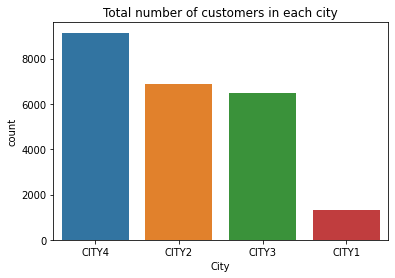

In [ ]:
#Countplot for Customers count in particular city
#showing frequency of different values
sns.countplot('City', data=df,order = df['City'].value_counts().index
              ).set(title = 'Total number of customers in each city')
plt.show()

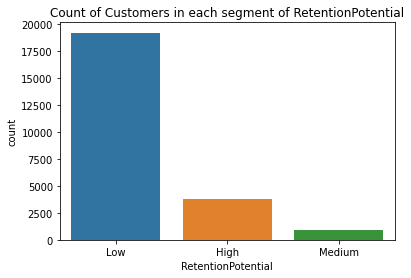

In [ ]:
#Countplot for Customers count in each level of target variable
sns.countplot('RetentionPotential', data=df,order = df['RetentionPotential'].value_counts().index
              ).set(title = 'Count of Customers in each segment of RetentionPotential')
plt.show()

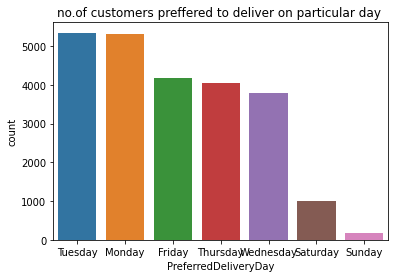

In [ ]:
#Seaborn Countplot for customers prefference
sns.countplot('PreferredDeliveryDay', data=df,order = df['PreferredDeliveryDay'].value_counts().index
              ).set(title = 'no.of customers preffered to deliver on particular day ')
plt.show()

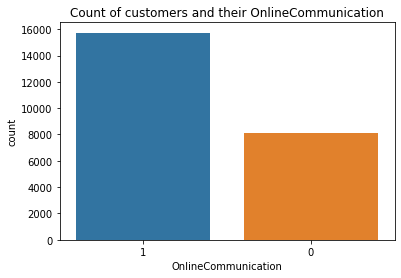

In [ ]:
#Seaborn Countplot for customers prefference
sns.countplot('OnlineCommunication', data=df,order = df['OnlineCommunication'].value_counts().index
              ).set(title = 'Count of customers and their OnlineCommunication')
plt.show()

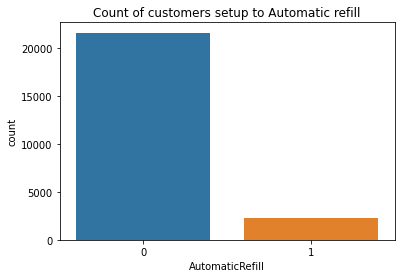

In [ ]:
#Seaborn Countplot for customers prefference
sns.countplot('AutomaticRefill', data=df,order = df['AutomaticRefill'].value_counts().index
              ).set(title = 'Count of customers setup to Automatic refill')
plt.show()

[Text(0.5, 1.0, 'Is customer ordering based on email interaction')]

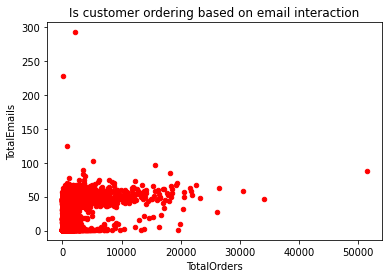

In [ ]:
#scatterplot for customer ordering based on email interaction
df.plot.scatter('TotalOrders', 'TotalEmails', color= 'red',
                  ).set(title = 'Is customer ordering based on email interaction')

[Text(0.5, 1.0, 'Total orders based on email clicked')]

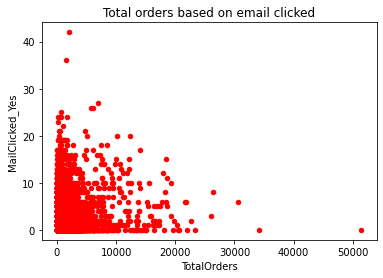

In [ ]:
#scatterplot for customer ordering based on email interaction
df.plot.scatter('TotalOrders', 'MailClicked_Yes', color= 'red',
                  ).set(title = 'Total orders based on email clicked')

[Text(0.5, 1.0, 'Density of interaction')]

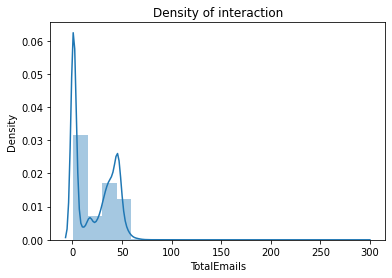

In [ ]:
# Plotting the histogram for distribution of total emails
sns.distplot( a=df["TotalEmails"], hist=True, bins = 20
             ).set(title = 'Density of interaction')

[Text(0.5, 1.0, 'Customers interaction based on mailclicked')]

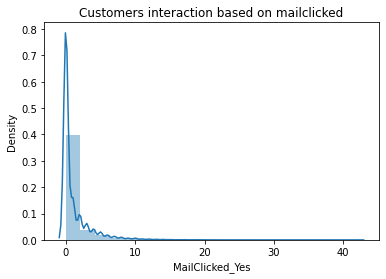

In [ ]:
# Plotting the histogram for distribution of total emails
sns.distplot( a=df["MailClicked_Yes"], hist=True, bins = 20
             ).set(title = 'Customers interaction based on mailclicked')

[Text(0.5, 1.0, 'level of RetentionPotential of customers in each city')]

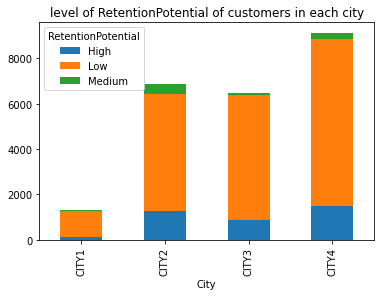

In [ ]:
#stacked bar plot
df.groupby(['City', 'RetentionPotential']
              )['RetentionPotential'].count().unstack().plot(kind='bar', stacked=True,
                                                             ).set(title = 'level of RetentionPotential of customers in each city')

#Dropping Features

In [ ]:
#Showing unique values in each column
df.nunique()

CustomerID              23820
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
TotalOrders              2206
No_ofOrders               150
TotalEmails                84
MailOpened_Yes             61
MailOpened_No              70
MailClicked_Yes            30
MailClicked_No             80
RetentionPotential          3
dtype: int64

In [ ]:
#assigning customerID to a variable for further use 
a = df['CustomerID']

In [ ]:
#Dropping ID for more Unique values
df.drop(['CustomerID'], axis=1, inplace=True)

Changing Data types

In [ ]:
df.dtypes

City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
TotalOrders               int64
No_ofOrders               int64
TotalEmails               int64
MailOpened_Yes            int64
MailOpened_No           float64
MailClicked_Yes         float64
MailClicked_No          float64
RetentionPotential       object
dtype: object

In [ ]:
num_cols=["AutomaticRefill","OnlineCommunication","TotalOrders","No_ofOrders","TotalEmails","DoorstepDelivery",
          "MailOpened_Yes","MailOpened_No","MailClicked_Yes","MailClicked_No"]
cat_cols=["City","PreferredDeliveryDay","RetentionPotential"]

In [ ]:
#changing object to category data type
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
TotalOrders                int64
No_ofOrders                int64
TotalEmails                int64
MailOpened_Yes             int64
MailOpened_No            float64
MailClicked_Yes          float64
MailClicked_No           float64
RetentionPotential      category
dtype: object

In [ ]:
df.RetentionPotential.value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

In [ ]:
df.RetentionPotential.value_counts(normalize = True)*100

Low       80.541562
High      15.768262
Medium     3.690176
Name: RetentionPotential, dtype: float64

#Splitting Data

In [ ]:
X = df.drop(["RetentionPotential"], axis = 1)

In [ ]:
y = df[["RetentionPotential"]]

In [ ]:
df.shape

(23820, 13)

In [ ]:
print(X.shape, y.shape)

(23820, 12) (23820, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15959, 12), (7861, 12), (15959, 1), (7861, 1))

In [ ]:
y_train.value_counts()

RetentionPotential
Low                   12817
High                   2568
Medium                  574
dtype: int64

In [ ]:
y_train.value_counts(normalize=True)*100

RetentionPotential
Low                   80.312050
High                  16.091234
Medium                 3.596717
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

RetentionPotential
Low                   81.007505
High                  15.112581
Medium                 3.879913
dtype: float64

## Convert categorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'TotalOrders', 'No_ofOrders', 'TotalEmails',
       'MailOpened_Yes', 'MailOpened_No', 'MailClicked_Yes', 'MailClicked_No'],
      dtype='object')

In [ ]:
X_test.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'TotalOrders', 'No_ofOrders', 'TotalEmails',
       'MailOpened_Yes', 'MailOpened_No', 'MailClicked_Yes', 'MailClicked_No'],
      dtype='object')

In [ ]:
X_train['City_encoded'] = LabelEncoder().fit_transform(X_train['City'])
X_train[['City', 'City_encoded']]

,City,City_encoded
15790,CITY3,2
2030,CITY3,2
20124,CITY2,1
4678,CITY2,1
104,CITY2,1
...,...,...
15377,CITY4,3
21602,CITY4,3
17730,CITY1,0
15725,CITY2,1


In [ ]:
X_test['City_encoded'] = LabelEncoder().fit_transform(X_test['City'])
X_test[['City', 'City_encoded']]

,City,City_encoded
16819,CITY3,2
7844,CITY2,1
23473,CITY1,0
16711,CITY2,1
1418,CITY1,0
...,...,...
18955,CITY4,3
8947,CITY4,3
19299,CITY4,3
3168,CITY2,1


In [ ]:
X_train['PreferredDeliveryDay_enc'] = LabelEncoder().fit_transform(X_train['PreferredDeliveryDay'])
X_train[['PreferredDeliveryDay', 'PreferredDeliveryDay_enc']]

,PreferredDeliveryDay,PreferredDeliveryDay_enc
15790,Thursday,4
2030,Tuesday,5
20124,Tuesday,5
4678,Monday,1
104,Monday,1
...,...,...
15377,Friday,0
21602,Friday,0
17730,Thursday,4
15725,Thursday,4


In [ ]:
X_test['PreferredDeliveryDay_enc'] = LabelEncoder().fit_transform(X_test['PreferredDeliveryDay'])
X_test[['PreferredDeliveryDay', 'PreferredDeliveryDay_enc']]

,PreferredDeliveryDay,PreferredDeliveryDay_enc
16819,Thursday,4
7844,Tuesday,5
23473,Thursday,4
16711,Monday,1
1418,Tuesday,5
...,...,...
18955,Thursday,4
8947,Thursday,4
19299,Friday,0
3168,Monday,1


In [ ]:
X_train = X_train.drop(columns=["City","PreferredDeliveryDay"])
X_train

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,City_encoded,PreferredDeliveryDay_enc
15790,1,0,0,224,3,28,14,14.0,5.0,22.0,2,4
2030,0,0,0,2051,39,43,12,31.0,0.0,42.0,2,5
20124,0,0,0,170,3,46,2,44.0,0.0,45.0,1,5
4678,0,0,0,153,2,1,1,0.0,0.0,0.0,1,1
104,0,0,0,515,14,23,2,21.0,1.0,21.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15377,0,0,0,41,1,1,1,0.0,0.0,0.0,3,0
21602,1,0,0,41,1,1,1,0.0,0.0,0.0,3,0
17730,1,1,1,40,1,1,1,0.0,0.0,0.0,0,4
15725,1,0,0,41,1,1,1,0.0,0.0,0.0,1,4


In [ ]:
X_test = X_test.drop(columns=["City","PreferredDeliveryDay"])
X_test

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,City_encoded,PreferredDeliveryDay_enc
16819,1,0,0,36,1,1,1,0.0,0.0,0.0,2,4
7844,0,0,0,422,3,43,15,28.0,7.0,35.0,1,5
23473,1,1,1,710,6,29,23,6.0,18.0,10.0,0,4
16711,1,0,0,36,1,1,1,0.0,0.0,0.0,1,1
1418,1,0,0,450,7,51,46,5.0,12.0,38.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
18955,1,0,0,35,1,1,1,0.0,0.0,0.0,3,4
8947,1,0,0,309,4,53,5,48.0,1.0,51.0,3,4
19299,0,0,0,39,1,1,1,0.0,0.0,0.0,3,0
3168,0,0,0,53,1,1,1,0.0,0.0,0.0,1,1


In [ ]:
y_train['RetentionPotential_enc'] = LabelEncoder().fit_transform(y_train['RetentionPotential'])
y_train[['RetentionPotential', 'RetentionPotential_enc']]

,RetentionPotential,RetentionPotential_enc
15790,Low,1
2030,Low,1
20124,Low,1
4678,High,0
104,Low,1
...,...,...
15377,High,0
21602,Low,1
17730,Low,1
15725,Low,1


In [ ]:
y_train = y_train.drop(columns=["RetentionPotential"])
y_train

,RetentionPotential_enc
15790,1
2030,1
20124,1
4678,0
104,1
...,...
15377,0
21602,1
17730,1
15725,1


In [ ]:
y_test['RetentionPotential_enc'] = LabelEncoder().fit_transform(y_test['RetentionPotential'])
y_test[['RetentionPotential', 'RetentionPotential_enc']]

,RetentionPotential,RetentionPotential_enc
16819,Low,1
7844,Low,1
23473,Low,1
16711,Low,1
1418,Low,1
...,...,...
18955,Low,1
8947,Low,1
19299,Low,1
3168,High,0


In [ ]:
y_test = y_test.drop(columns=["RetentionPotential"])
y_test

,RetentionPotential_enc
16819,1
7844,1
23473,1
16711,1
1418,1
...,...
18955,1
8947,1
19299,1
3168,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_cols = X_train.select_dtypes(include=['category']).columns

In [ ]:
enc = OneHotEncoder(drop = 'first')
enc.fit(X_train[cat_cols])

OneHotEncoder(drop='first')

In [ ]:
X_train_ohe=enc.transform(X_train[cat_cols]).toarray()
X_test_ohe=enc.transform(X_test[cat_cols]).toarray()

In [ ]:
print(X_train_ohe.shape)
print(X_test_ohe.shape)

(15959, 0)
(7861, 0)


## standardize numerical variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [ ]:
X_train_std = scaler.transform(X_train[num_cols])
X_test_std = scaler.transform(X_test[num_cols])

In [ ]:
print(X_train_std.shape)
print(X_test_std.shape)

(15959, 12)
(7861, 12)


Concatenate

In [ ]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [ ]:
print(X_train_con.shape)
print(X_test_con.shape)

(15959, 12)
(7861, 12)


#Model Building

In [ ]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print(classification_report(act,pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))
    print("F1_score : ", f1_score(act, pred, average='weighted'))

UPSAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train_con, y_train)

In [ ]:
np.unique(y_train, return_counts= True)
np.unique(y_train_sm, return_counts= True)

(array([0, 1, 2]), array([12817, 12817, 12817]))

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(X_train_con, y_train)

train_pred_lr = m1.predict(X_train_con)
test_pred_lr = m1.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_lr)
print("--Test--")
evaluate_model(y_test, test_pred_lr)

--Train--
Confusion Matrix 
 [[ 1185  1381     2]
 [  529 12271    17]
 [   72   417    85]]
              precision    recall  f1-score   support

           0       0.66      0.46      0.54      2568
           1       0.87      0.96      0.91     12817
           2       0.82      0.15      0.25       574

    accuracy                           0.85     15959
   macro avg       0.78      0.52      0.57     15959
weighted avg       0.84      0.85      0.83     15959

Accurcay :  0.8484867472899305
Recall   :  0.8484867472899305
Precision:  0.8366433222268082
F1_score :  0.829709360911517
--Test--
Confusion Matrix 
 [[ 551  635    2]
 [ 287 6077    4]
 [  38  239   28]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1188
           1       0.87      0.95      0.91      6368
           2       0.82      0.09      0.17       305

    accuracy                           0.85      7861
   macro avg       0.78      0.50      0.54     

In [ ]:
m2 = LogisticRegression(solver='saga',penalty='l2', max_iter=1000)
m2.fit(X_train_sm, y_train_sm)

train_pred_lr_hp = m2.predict(X_train_con)
test_pred_lr_hp = m2.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_lr_hp)
print("--Test--")
evaluate_model(y_test, test_pred_lr_hp)

--Train--
Confusion Matrix 
 [[2251  207  110]
 [4077 7930  810]
 [  49   75  450]]
              precision    recall  f1-score   support

           0       0.35      0.88      0.50      2568
           1       0.97      0.62      0.75     12817
           2       0.33      0.78      0.46       574

    accuracy                           0.67     15959
   macro avg       0.55      0.76      0.57     15959
weighted avg       0.84      0.67      0.70     15959

Accurcay :  0.6661444952691271
Recall   :  0.6661444952691271
Precision:  0.8441553902107867
F1_score :  0.7033490486945563
--Test--
Confusion Matrix 
 [[1039   97   52]
 [2033 3927  408]
 [  24   31  250]]
              precision    recall  f1-score   support

           0       0.34      0.87      0.49      1188
           1       0.97      0.62      0.75      6368
           2       0.35      0.82      0.49       305

    accuracy                           0.66      7861
   macro avg       0.55      0.77      0.58      7861
we

In [ ]:
m3 = LogisticRegression()
m3.fit(X_train_sm, y_train_sm)

train_pred_lr_sm = m3.predict(X_train_sm)
test_pred_lr_sm = m3.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_lr_sm)
print("--Test--")
evaluate_model(y_test, test_pred_lr_sm)

--Train--
Confusion Matrix 
 [[11340  1011   466]
 [ 4077  7930   810]
 [  900  1460 10457]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78     12817
           1       0.76      0.62      0.68     12817
           2       0.89      0.82      0.85     12817

    accuracy                           0.77     38451
   macro avg       0.78      0.77      0.77     38451
weighted avg       0.78      0.77      0.77     38451

Accurcay :  0.7731138331902941
Recall   :  0.7731138331902941
Precision:  0.7828847650485526
F1_score :  0.7711522292295377
--Test--
Confusion Matrix 
 [[1039   97   52]
 [2033 3927  408]
 [  24   31  250]]
              precision    recall  f1-score   support

           0       0.34      0.87      0.49      1188
           1       0.97      0.62      0.75      6368
           2       0.35      0.82      0.49       305

    accuracy                           0.66      7861
   macro avg       0.55      0.77      0.58    

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
m4 = KNeighborsClassifier(n_neighbors=3)
m4.fit(X_train_con, y_train)

train_pred_knn = m4.predict(X_train_con)
test_pred_knn = m4.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_knn)
print("--Test--")
evaluate_model(y_test, test_pred_knn)

--Train--
Confusion Matrix 
 [[ 1655   893    20]
 [  598 12212     7]
 [   76    96   402]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.68      2568
           1       0.93      0.95      0.94     12817
           2       0.94      0.70      0.80       574

    accuracy                           0.89     15959
   macro avg       0.86      0.77      0.81     15959
weighted avg       0.89      0.89      0.89     15959

Accurcay :  0.8941036405789836
Recall   :  0.8941036405789836
Precision:  0.8910005356549351
F1_score :  0.891512720633622
--Test--
Confusion Matrix 
 [[ 646  530   12]
 [ 447 5911   10]
 [  56   80  169]]
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1188
           1       0.91      0.93      0.92      6368
           2       0.88      0.55      0.68       305

    accuracy                           0.86      7861
   macro avg       0.78      0.68      0.72     

In [ ]:
m5 = KNeighborsClassifier()
m5.fit(X_train_sm, y_train_sm)

train_pred_knn_sm = m5.predict(X_train_sm)
test_pred_knn_sm = m5.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_knn_sm)
print("--Test--")
evaluate_model(y_test, test_pred_knn_sm)

--Train--
Confusion Matrix 
 [[10385  2338    94]
 [ 1242 11422   153]
 [   56   285 12476]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     12817
           1       0.81      0.89      0.85     12817
           2       0.98      0.97      0.98     12817

    accuracy                           0.89     38451
   macro avg       0.89      0.89      0.89     38451
weighted avg       0.89      0.89      0.89     38451

Accurcay :  0.8916022990299342
Recall   :  0.8916022990299342
Precision:  0.8942426287036294
F1_score :  0.8917176870559902
--Test--
Confusion Matrix 
 [[ 785  369   34]
 [ 785 5464  119]
 [  34   48  223]]
              precision    recall  f1-score   support

           0       0.49      0.66      0.56      1188
           1       0.93      0.86      0.89      6368
           2       0.59      0.73      0.65       305

    accuracy                           0.82      7861
   macro avg       0.67      0.75      0.70    

In [ ]:
m6 = KNeighborsClassifier(n_neighbors=30)
m6.fit(X_train_con, y_train)

train_pred_knn_hp = m6.predict(X_train_con)
test_pred_knn_hp = m6.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_knn_hp)
print("--Test--")
evaluate_model(y_test, test_pred_knn_hp)

--Train--
Confusion Matrix 
 [[ 1311  1247    10]
 [  533 12279     5]
 [  146   201   227]]
              precision    recall  f1-score   support

           0       0.66      0.51      0.58      2568
           1       0.89      0.96      0.93     12817
           2       0.94      0.40      0.56       574

    accuracy                           0.87     15959
   macro avg       0.83      0.62      0.69     15959
weighted avg       0.86      0.87      0.86     15959

Accurcay :  0.8657810639764396
Recall   :  0.8657810639764396
Precision:  0.8581487714188653
F1_score :  0.8556080255911251
--Test--
Confusion Matrix 
 [[ 619  562    7]
 [ 308 6054    6]
 [  82  109  114]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1188
           1       0.90      0.95      0.92      6368
           2       0.90      0.37      0.53       305

    accuracy                           0.86      7861
   macro avg       0.80      0.62      0.67    

RandomForest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m7 = RandomForestClassifier()
m7.fit(X_train_con, y_train)

train_pred_rf = m7.predict(X_train_con)
test_pred_rf = m7.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
Confusion Matrix 
 [[ 1901   667     0]
 [  199 12618     0]
 [    0    26   548]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      2568
           1       0.95      0.98      0.97     12817
           2       1.00      0.95      0.98       574

    accuracy                           0.94     15959
   macro avg       0.95      0.89      0.92     15959
weighted avg       0.94      0.94      0.94     15959

Accurcay :  0.9441067736073688
Recall   :  0.9441067736073688
Precision:  0.9429394170964526
F1_score :  0.9418961042293288
--Test--
Confusion Matrix 
 [[ 632  542   14]
 [ 321 6038    9]
 [  19   49  237]]
              precision    recall  f1-score   support

           0       0.65      0.53      0.59      1188
           1       0.91      0.95      0.93      6368
           2       0.91      0.78      0.84       305

    accuracy                           0.88      7861
   macro avg       0.82      0.75      0.78    

In [ ]:
m8 = RandomForestClassifier()
m8.fit(X_train_sm, y_train_sm)

train_pred_rf_sm = m8.predict(X_train_sm)
test_pred_rf_sm = m8.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_rf_sm)
print("--Test--")
evaluate_model(y_test, test_pred_rf_sm)

--Train--
Confusion Matrix 
 [[12510   307     0]
 [ 1481 11277    59]
 [    0    88 12729]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12817
           1       0.97      0.88      0.92     12817
           2       1.00      0.99      0.99     12817

    accuracy                           0.95     38451
   macro avg       0.95      0.95      0.95     38451
weighted avg       0.95      0.95      0.95     38451

Accurcay :  0.9496762112818913
Recall   :  0.9496762112818913
Precision:  0.9518969547147144
F1_score :  0.9495157857691193
--Test--
Confusion Matrix 
 [[ 915  252   21]
 [1105 5199   64]
 [   6   39  260]]
              precision    recall  f1-score   support

           0       0.45      0.77      0.57      1188
           1       0.95      0.82      0.88      6368
           2       0.75      0.85      0.80       305

    accuracy                           0.81      7861
   macro avg       0.72      0.81      0.75    

In [ ]:
param_grid = {"n_estimators" : [100,300,700],
              "max_depth" : [3,5,7,11],
              "max_features" : [3,5,7,9],
              "min_samples_leaf" : [2,4,6]}

In [ ]:
#Returning the best combination of parameters
#specifing the no.of folds
m9 = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
m9 = GridSearchCV(m9,param_grid,cv=5)
m9.fit(X_train_con,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 11],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [100, 300, 700]})

In [ ]:
m9.best_params_

{'max_depth': 11,
 'max_features': 7,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [ ]:
m9 = RandomForestClassifier(max_depth=11,n_estimators=300,max_features=7,min_samples_leaf=2)
m9.fit(X_train_sm, y_train_sm)

train_pred_rf_hp = m9.predict(X_train_sm)
test_pred_rf_hp = m9.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_rf_hp)
print("--Test--")
evaluate_model(y_test, test_pred_rf_hp)

--Train--
Confusion Matrix 
 [[12375   311   131]
 [ 2958  9666   193]
 [   27    53 12737]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     12817
           1       0.96      0.75      0.85     12817
           2       0.98      0.99      0.98     12817

    accuracy                           0.90     38451
   macro avg       0.91      0.90      0.90     38451
weighted avg       0.91      0.90      0.90     38451

Accurcay :  0.9044758263764271
Recall   :  0.9044758263764271
Precision:  0.9148554198383702
F1_score :  0.9029715810562575
--Test--
Confusion Matrix 
 [[1091   80   17]
 [1563 4683  122]
 [   3   30  272]]
              precision    recall  f1-score   support

           0       0.41      0.92      0.57      1188
           1       0.98      0.74      0.84      6368
           2       0.66      0.89      0.76       305

    accuracy                           0.77      7861
   macro avg       0.68      0.85      0.72    

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
m10 = DecisionTreeClassifier()
m10 = m10.fit(X_train_con,y_train)

train_pred_dt = m10.predict(X_train_con)
test_pred_dt = m10.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_dt)
print("--Test--")
evaluate_model(y_test, test_pred_dt)

--Train--
Confusion Matrix 
 [[ 1981   587     0]
 [  279 12538     0]
 [    0    26   548]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2568
           1       0.95      0.98      0.97     12817
           2       1.00      0.95      0.98       574

    accuracy                           0.94     15959
   macro avg       0.94      0.90      0.92     15959
weighted avg       0.94      0.94      0.94     15959

Accurcay :  0.9441067736073688
Recall   :  0.9441067736073688
Precision:  0.9426997644633498
F1_score :  0.9427164712558339
--Test--
Confusion Matrix 
 [[ 653  527    8]
 [ 440 5883   45]
 [  28   41  236]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.57      1188
           1       0.91      0.92      0.92      6368
           2       0.82      0.77      0.79       305

    accuracy                           0.86      7861
   macro avg       0.77      0.75      0.76    

In [ ]:
m11 = DecisionTreeClassifier()
m11.fit(X_train_sm,y_train_sm)

train_pred_dt_sm = m11.predict(X_train_sm)
test_pred_dt_sm = m11.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_dt_sm)
print("--Test--")
evaluate_model(y_test, test_pred_dt_sm)

--Train--
Confusion Matrix 
 [[12538   279     0]
 [ 1509 11250    58]
 [    0    89 12728]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12817
           1       0.97      0.88      0.92     12817
           2       1.00      0.99      0.99     12817

    accuracy                           0.95     38451
   macro avg       0.95      0.95      0.95     38451
weighted avg       0.95      0.95      0.95     38451

Accurcay :  0.9496762112818913
Recall   :  0.9496762112818913
Precision:  0.952121242820125
F1_score :  0.9495037745739809
--Test--
Confusion Matrix 
 [[ 884  289   15]
 [1160 5107  101]
 [  28   38  239]]
              precision    recall  f1-score   support

           0       0.43      0.74      0.54      1188
           1       0.94      0.80      0.87      6368
           2       0.67      0.78      0.72       305

    accuracy                           0.79      7861
   macro avg       0.68      0.78      0.71     

In [ ]:
param_grid = {"criterion": ["gini","entropy"],
              "max_depth" : [15,20],
              "max_features" : [5,7,9,10],
              "min_samples_leaf" : [3,5,15,20],
             "min_samples_split":[2,4,6,8],
             "max_leaf_nodes":[4,8,10,15]}

In [ ]:
m12 = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
m12 = GridSearchCV(m12,param_grid,cv=5)
m12.fit(X_train_con,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20], 'max_features': [5, 7, 9, 10],
                         'max_leaf_nodes': [4, 8, 10, 15],
                         'min_samples_leaf': [3, 5, 15, 20],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
m12.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 9,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 4}

In [ ]:
m12 = DecisionTreeClassifier(criterion="gini",max_depth=20,max_features=9,
                            max_leaf_nodes=15,min_samples_leaf=15,min_samples_split =6)
m12.fit(X_train_sm,y_train_sm)

train_pred_dt_hp = m12.predict(X_train_sm)
test_pred_dt_hp = m12.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_dt_hp)
print("--Test--")
evaluate_model(y_test, test_pred_dt_hp)

--Train--
Confusion Matrix 
 [[11074  1186   557]
 [ 3036  9018   763]
 [  295   506 12016]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     12817
           1       0.84      0.70      0.77     12817
           2       0.90      0.94      0.92     12817

    accuracy                           0.84     38451
   macro avg       0.84      0.84      0.83     38451
weighted avg       0.84      0.84      0.83     38451

Accurcay :  0.8350368000832228
Recall   :  0.8350368000832228
Precision:  0.8372658165638769
F1_score :  0.833038512143087
--Test--
Confusion Matrix 
 [[1020  106   62]
 [1578 4397  393]
 [   8   13  284]]
              precision    recall  f1-score   support

           0       0.39      0.86      0.54      1188
           1       0.97      0.69      0.81      6368
           2       0.38      0.93      0.54       305

    accuracy                           0.73      7861
   macro avg       0.58      0.83      0.63     

SVM

In [ ]:
from sklearn import svm
m13 = svm.SVC(kernel='linear')
m13 = m13.fit(X_train_con,y_train)

train_pred_svm = m13.predict(X_train_con)
test_pred_svm = m13.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_svm)
print("--Test--")
evaluate_model(y_test, test_pred_svm)

--Train--
Confusion Matrix 
 [[ 1218  1349     1]
 [  537 12266    14]
 [  235   280    59]]
              precision    recall  f1-score   support

           0       0.61      0.47      0.53      2568
           1       0.88      0.96      0.92     12817
           2       0.80      0.10      0.18       574

    accuracy                           0.85     15959
   macro avg       0.76      0.51      0.54     15959
weighted avg       0.84      0.85      0.83     15959

Accurcay :  0.84861206842534
Recall   :  0.84861206842534
Precision:  0.8361301058552028
F1_score :  0.8301251799175482
--Test--
Confusion Matrix 
 [[ 567  621    0]
 [ 289 6074    5]
 [ 125  157   23]]
              precision    recall  f1-score   support

           0       0.58      0.48      0.52      1188
           1       0.89      0.95      0.92      6368
           2       0.82      0.08      0.14       305

    accuracy                           0.85      7861
   macro avg       0.76      0.50      0.53      78

In [ ]:
m14 = svm.SVC(kernel='rbf',C=10)
m14.fit(X_train_sm, y_train_sm)

train_pred_svm1 = m14.predict(X_train_sm)
test_pred_svm1 = m14.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_svm1)
print("--Test--")
evaluate_model(y_test, test_pred_svm1)

--Train--
Confusion Matrix 
 [[11543   677   597]
 [ 3802  8233   782]
 [  634   201 11982]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80     12817
           1       0.90      0.64      0.75     12817
           2       0.90      0.93      0.92     12817

    accuracy                           0.83     38451
   macro avg       0.84      0.83      0.82     38451
weighted avg       0.84      0.83      0.82     38451

Accurcay :  0.825934305999844
Recall   :  0.825934305999844
Precision:  0.8409359215875014
F1_score :  0.8226819375631969
--Test--
Confusion Matrix 
 [[1063   52   73]
 [1909 4046  413]
 [  22   18  265]]
              precision    recall  f1-score   support

           0       0.36      0.89      0.51      1188
           1       0.98      0.64      0.77      6368
           2       0.35      0.87      0.50       305

    accuracy                           0.68      7861
   macro avg       0.56      0.80      0.59      

In [ ]:
m15 = svm.SVC(kernel='rbf', C=1)
m15.fit(X_train_sm, y_train_sm)

train_pred_svm2 = m15.predict(X_train_sm)
test_pred_svm2 = m15.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_svm2)
print("--Test--")
evaluate_model(y_test, test_pred_svm2)

--Train--
Confusion Matrix 
 [[11474   698   645]
 [ 3789  8370   658]
 [  286   147 12384]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     12817
           1       0.91      0.65      0.76     12817
           2       0.90      0.97      0.93     12817

    accuracy                           0.84     38451
   macro avg       0.85      0.84      0.83     38451
weighted avg       0.85      0.84      0.83     38451

Accurcay :  0.8381576551975242
Recall   :  0.8381576551975242
Precision:  0.8503423752983454
F1_score :  0.8344336868346875
--Test--
Confusion Matrix 
 [[1064   53   71]
 [1910 4114  344]
 [  16   25  264]]
              precision    recall  f1-score   support

           0       0.36      0.90      0.51      1188
           1       0.98      0.65      0.78      6368
           2       0.39      0.87      0.54       305

    accuracy                           0.69      7861
   macro avg       0.58      0.80      0.61    

Comparision

In [ ]:
performance_columns = ['Model name', 'Train accuracy', 'Train precision', 'Train recall','Train F1_score',
                       'Test accuracy', 'Test precision', 'Test recall','Test F1_score']
performance_comparison = pd.DataFrame(columns=performance_columns)

In [ ]:
from numpy.lib.function_base import average
def add_to_perform_compare_df(df, model_name, train_actual, train_predict, test_actual, test_predict):
    
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    
    train_accuracy = accuracy_score(train_actual, train_predict)
    test_accuracy = accuracy_score(test_actual, test_predict)
    
    train_recall = recall_score(train_actual, train_predict,average='weighted')
    test_recall = recall_score(test_actual,test_predict,average='weighted')
    
    train_precision = precision_score(train_actual, train_predict,average='weighted')
    test_precision = precision_score(test_actual, test_predict,average='weighted')

    train_f1 = f1_score(train_actual, train_predict,average='weighted')
    test_f1 = f1_score(test_actual, test_predict,average='weighted')
    
    df = df.append(pd.Series([model_name, train_accuracy, train_precision, train_recall, train_f1,
                              test_accuracy, test_precision, test_recall,test_f1],
                             index=df.columns),ignore_index=True)
    return df

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Logistic Regression',
                                                   y_train, train_pred_lr, y_test, test_pred_lr)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Logistic Regression_SM',
                                                   y_train_sm, train_pred_lr_sm, y_test, test_pred_lr_sm)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Logistic Regression_HP',
                                                   y_train, train_pred_lr_hp, y_test, test_pred_lr_hp)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'KNN',
                                                   y_train, train_pred_knn, y_test, test_pred_knn)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'KNN_SM',
                                                   y_train_sm, train_pred_knn_sm, y_test, test_pred_knn_sm)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'KNN_HP',
                                                   y_train, train_pred_knn_hp, y_test, test_pred_knn_hp)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Random Forest',
                                                   y_train, train_pred_rf, y_test, test_pred_rf)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Random Forest_SM',
                                                   y_train_sm, train_pred_rf_sm, y_test, test_pred_rf_sm)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Random Forest_HP',
                                                   y_train_sm, train_pred_rf_hp, y_test, test_pred_rf_hp)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Decision Tree',
                                                   y_train, train_pred_dt, y_test, test_pred_dt)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Decision Tree_SM',
                                                   y_train_sm, train_pred_dt_sm, y_test, test_pred_dt_sm)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Decision Tree_HP',
                                                   y_train_sm, train_pred_dt_hp, y_test, test_pred_dt_hp)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'SVM',
                                                   y_train, train_pred_svm, y_test, test_pred_svm)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'SVM tune1',
                                                   y_train_sm, train_pred_svm1, y_test, test_pred_svm1)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'SVM tune2',
                                                   y_train_sm, train_pred_svm2, y_test, test_pred_svm2)

In [ ]:
performance_comparison

,Model name,Train accuracy,Train precision,Train recall,Train F1_score,Test accuracy,Test precision,Test recall,Test F1_score
0,Logistic Regression,0.848487,0.836643,0.848487,0.829709,0.846712,0.835228,0.846712,0.826316
1,Logistic Regression_SM,0.773114,0.782885,0.773114,0.771152,0.663529,0.848883,0.663529,0.702831
2,Logistic Regression_HP,0.666144,0.844155,0.666144,0.703349,0.663529,0.848883,0.663529,0.702831
3,KNN,0.894104,0.891001,0.894104,0.891513,0.855616,0.853595,0.855616,0.853003
4,KNN_SM,0.891602,0.894243,0.891602,0.891718,0.823305,0.849608,0.823305,0.833104
5,KNN_HP,0.865781,0.858149,0.865781,0.855608,0.863376,0.856788,0.863376,0.854768
6,Random Forest,0.944107,0.942939,0.944107,0.941896,0.878641,0.871484,0.878641,0.873658
7,Random Forest_SM,0.949676,0.951897,0.949676,0.949516,0.810838,0.864629,0.810838,0.827424
8,Random Forest_HP,0.904476,0.914855,0.904476,0.902972,0.769113,0.879215,0.769113,0.795033
9,Decision Tree,0.944107,0.942700,0.944107,0.942716,0.861468,0.858466,0.861468,0.859841


In [ ]:
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [ ]:
models = []
models.append(("LoR", LogisticRegression()) )
models.append(("KNN", KNeighborsClassifier()) )
models.append(("RF", RandomForestClassifier()) )
models.append(("DT", DecisionTreeClassifier()) )
models.append(("SVM", svm.SVC()))

In [ ]:
results = []
names = []

for name, model in models:
    model.fit(X_train_con,y_train)
    y_pred=model.predict(X_test_con)
    predictions=[round(value) for value in y_pred]
    recall=recall_score(y_test,predictions,average='weighted')
    print('Recall: %2f%%' %(recall*100),name)

Recall: 84.671161% LoR
Recall: 85.434423% KNN
Recall: 87.864139% RF
Recall: 85.892380% DT
Recall: 86.375779% SVM


In [ ]:
results = []
names = []

for name, model in models:
    model.fit(X_train_sm,y_train_sm)
    y_pred=model.predict(X_test_con)
    predictions=[round(value) for value in y_pred]
    recall=recall_score(y_test,predictions,average='weighted')
    print('Recall: %2f%%' %(recall*100),name)

Recall: 66.352881% LoR
Recall: 82.330492% KNN
Recall: 81.198321% RF
Recall: 79.315609% DT
Recall: 69.227834% SVM


#Test Data 

In [ ]:
#To read the uploaded test files
test_customer = pd. read_excel("/content/Customerdata_Test.xlsx")
test_email =pd.read_excel("/content/Emaildata_Test.xlsx")
test_train = pd.read_excel("/content/Test.xlsx")
test_trans = pd.read_excel("/content/transactionsdata_Test.xlsx")

#Test Modification

Test Transaction modification

In [ ]:
test_trans.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
tt1 = test_trans.groupby(['CustomerID'], as_index=False, sort=True).sum()
tt1.rename(columns = {'OrderQuantity':'TotalOrders'}, inplace = True)
tt1.head()

,CustomerID,TotalOrders
0,C12121,52
1,C12132,40
2,C12134,40
3,C12135,41
4,C12136,79


In [ ]:
tt2 = test_trans.groupby(['CustomerID'], as_index=False, sort=True).count()
tt2.rename(columns = {'DateOfOrder':'No_ofOrders'}, inplace = True)
tt2.head()

,CustomerID,No_ofOrders,timestamp,OrderQuantity
0,C12121,1,1,1
1,C12132,1,1,1
2,C12134,1,1,1
3,C12135,1,1,1
4,C12136,1,1,1


In [ ]:
tt3 = pd.merge(tt1,tt2, on=['CustomerID'], how='outer')
tt3.head()

,CustomerID,TotalOrders,No_ofOrders,timestamp,OrderQuantity
0,C12121,52,1,1,1
1,C12132,40,1,1,1
2,C12134,40,1,1,1
3,C12135,41,1,1,1
4,C12136,79,1,1,1


In [ ]:
test_trans= tt3.drop(['OrderQuantity', 'timestamp'], axis = 1)
test_trans.head()

,CustomerID,TotalOrders,No_ofOrders
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1


Test Email data modifications

In [ ]:
test_email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
test_email = test_email.drop([ 'timestamp'], axis = 1)
test_email.head()

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,yes,NotApplicable


In [ ]:
test_e1 = test_email.groupby(['CustomerID'], as_index=False, sort=True).count()
test_e1.rename(columns = {'DateOfemail':'TotalEmails'}, inplace = True)
test_e1.head()

,CustomerID,TotalEmails,EmailType,MailOpened,MailClicked
0,C12121,25,25,25,25
1,C12132,1,1,1,1
2,C12134,1,1,1,1
3,C12135,30,30,30,30
4,C12136,42,42,42,42


In [ ]:
test_e1 = test_e1.drop(['EmailType','MailOpened','MailClicked'], axis = 1)
test_e1.head()

,CustomerID,TotalEmails
0,C12121,25
1,C12132,1
2,C12134,1
3,C12135,30
4,C12136,42


In [ ]:
Y1 = 'yes'
test_e2 = test_email[test_email['MailOpened'] == Y1]
test_e2 = test_e2.drop(['DateOfemail','EmailType','MailClicked'], axis = 1)
test_e2.rename(columns = {'MailOpened':'MailOpened_Yes'}, inplace = True)
test_e2.head()

,CustomerID,MailOpened_Yes
0,C17838,yes
1,C12403,yes
2,C19041,yes
3,C24069,yes
4,C26718,yes


In [ ]:
N1 = 'no'
test_e3 = test_email[test_email['MailOpened'] == N1]
test_e3 = test_e3.drop(['DateOfemail','EmailType','MailClicked'], axis = 1)
test_e3.rename(columns = {'MailOpened':'MailOpened_No'}, inplace = True)
test_e3.head()

,CustomerID,MailOpened_No
5959,C12403,no
5964,C12403,no
5969,C12403,no
5974,C12403,no
5978,C12403,no


In [ ]:
Y2 = 'yes'
test_e4 = test_email[test_email['MailClicked'] == Y2]
test_e4 = test_e4.drop(['DateOfemail','EmailType','MailOpened'], axis = 1)
test_e4.rename(columns = {'MailClicked':'MailClicked_Yes'}, inplace = True)
test_e4.head()

,CustomerID,MailClicked_Yes
5967,C12403,yes
5970,C12403,yes
5976,C12403,yes
5985,C12403,yes
5991,C12403,yes


In [ ]:
N2 = 'no'
test_e5 = test_email[test_email['MailClicked'] == N2]
test_e5 = test_e5.drop(['DateOfemail','EmailType','MailOpened'], axis = 1)
test_e5.rename(columns = {'MailClicked':'MailClicked_No'}, inplace = True)
test_e5.head()

,CustomerID,MailClicked_No
5955,C12403,no
5956,C12403,no
5957,C12403,no
5958,C12403,no
5959,C12403,no


In [ ]:
test_email1 = test_e2.groupby(['CustomerID'], as_index=False, sort=True).count()
test_email2 = test_e3.groupby(['CustomerID'], as_index=False, sort=True).count()
test_email3 = test_e4.groupby(['CustomerID'], as_index=False, sort=True).count()
test_email4 = test_e5.groupby(['CustomerID'], as_index=False, sort=True).count()

In [ ]:
test_email1.head()

,CustomerID,MailOpened_Yes
0,C12121,9
1,C12132,1
2,C12134,1
3,C12135,9
4,C12136,4


In [ ]:
test_email2.head()

,CustomerID,MailOpened_No
0,C12121,16
1,C12135,21
2,C12136,38
3,C12157,14
4,C12163,45


In [ ]:
test_email3.head()

,CustomerID,MailClicked_Yes
0,C12121,3
1,C12135,5
2,C12136,1
3,C12167,4
4,C12198,1


In [ ]:
test_email4.head()

,CustomerID,MailClicked_No
0,C12121,21
1,C12135,24
2,C12136,40
3,C12157,27
4,C12163,46


In [ ]:
test_email5 = pd.merge(test_email1,test_email2, on = ['CustomerID'], how = 'outer')
test_email5.head()

,CustomerID,MailOpened_Yes,MailOpened_No
0,C12121,9,16.0
1,C12132,1,NaN
2,C12134,1,NaN
3,C12135,9,21.0
4,C12136,4,38.0


In [ ]:
test_email6 = pd.merge(test_email3,test_email4, on = ['CustomerID'], how = 'outer')
test_email6.head()

,CustomerID,MailClicked_Yes,MailClicked_No
0,C12121,3.0,21.0
1,C12135,5.0,24.0
2,C12136,1.0,40.0
3,C12167,4.0,24.0
4,C12198,1.0,45.0


In [ ]:
test_email7 = pd.merge(test_email5,test_email6, on = ['CustomerID'], how = 'outer')
test_email7.head()

,CustomerID,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
0,C12121,9,16.0,3.0,21.0
1,C12132,1,NaN,NaN,NaN
2,C12134,1,NaN,NaN,NaN
3,C12135,9,21.0,5.0,24.0
4,C12136,4,38.0,1.0,40.0


In [ ]:
test_email = pd.merge(test_e1,test_email7, on = ['CustomerID'], how = 'outer')
test_email.head()

,CustomerID,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
0,C12121,25,9,16.0,3.0,21.0
1,C12132,1,1,NaN,NaN,NaN
2,C12134,1,1,NaN,NaN,NaN
3,C12135,30,9,21.0,5.0,24.0
4,C12136,42,4,38.0,1.0,40.0


#Merging test data

In [ ]:
test_merge1 = pd.merge(test_customer,test_trans, on = ['CustomerID'], how = 'outer', sort = True)
test_merge1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,TotalOrders,No_ofOrders
0,C12121,CITY1,2017-12-04,1,0,0,Friday,52,1
1,C12132,CITY3,2013-10-20,1,0,0,Tuesday,40,1
2,C12134,CITY3,2013-09-18,1,0,0,Monday,40,1
3,C12135,CITY3,2017-11-01,1,0,1,Wednesday,41,1
4,C12136,CITY2,2013-09-28,1,0,0,Thursday,79,1


In [ ]:
test_merge2 = pd.merge(test_email,test_train, on = ['CustomerID'], how = 'outer',sort = True)
test_merge2.head()

,CustomerID,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
0,C12121,25,9,16.0,3.0,21.0
1,C12132,1,1,NaN,NaN,NaN
2,C12134,1,1,NaN,NaN,NaN
3,C12135,30,9,21.0,5.0,24.0
4,C12136,42,4,38.0,1.0,40.0


In [ ]:
test_data = pd.merge(test_merge1,test_merge2, on = ['CustomerID'], how = 'outer',sort = True)
test_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No
0,C12121,CITY1,2017-12-04,1,0,0,Friday,52,1,25,9,16.0,3.0,21.0
1,C12132,CITY3,2013-10-20,1,0,0,Tuesday,40,1,1,1,NaN,NaN,NaN
2,C12134,CITY3,2013-09-18,1,0,0,Monday,40,1,1,1,NaN,NaN,NaN
3,C12135,CITY3,2017-11-01,1,0,1,Wednesday,41,1,30,9,21.0,5.0,24.0
4,C12136,CITY2,2013-09-28,1,0,0,Thursday,79,1,42,4,38.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,CITY1,2012-08-28,1,0,0,Sunday,379,5,11,3,8.0,1.0,9.0
5951,C42155,CITY4,2013-09-14,1,0,0,Thursday,41,1,1,1,NaN,NaN,NaN
5952,C42157,CITY4,2013-09-30,1,0,0,Tuesday,41,1,1,1,NaN,NaN,NaN
5953,C42167,CITY2,2016-10-28,0,0,0,Monday,502,6,50,4,46.0,1.0,48.0


#Test Dropping and filling nulls

In [ ]:
test_data.drop(['DateOfRegistration'], axis=1, inplace=True)

In [ ]:
test_data.isnull().sum()

CustomerID                 0
City                       0
OnlineCommunication        0
AutomaticRefill            0
DoorstepDelivery           0
PreferredDeliveryDay       0
TotalOrders                0
No_ofOrders                0
TotalEmails                0
MailOpened_Yes             0
MailOpened_No           2578
MailClicked_Yes         3786
MailClicked_No          2471
dtype: int64

In [ ]:
test_data.isnull().sum().sum()

8835

In [ ]:
test_df = test_data.fillna(value = 0)

In [ ]:
test_df.isnull().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
TotalOrders             0
No_ofOrders             0
TotalEmails             0
MailOpened_Yes          0
MailOpened_No           0
MailClicked_Yes         0
MailClicked_No          0
dtype: int64

In [ ]:
a = test_df['CustomerID']

In [ ]:
test_df.drop(['CustomerID'], axis=1, inplace=True)

In [ ]:
test_df.dtypes

City                     object
OnlineCommunication       int64
AutomaticRefill           int64
DoorstepDelivery          int64
PreferredDeliveryDay     object
TotalOrders               int64
No_ofOrders               int64
TotalEmails               int64
MailOpened_Yes            int64
MailOpened_No           float64
MailClicked_Yes         float64
MailClicked_No          float64
dtype: object

In [ ]:
num_cols=["AutomaticRefill","OnlineCommunication","TotalOrders","No_ofOrders","TotalEmails","DoorstepDelivery",
          "MailOpened_Yes","MailOpened_No","MailClicked_Yes","MailClicked_No"]
cat_cols=["City","PreferredDeliveryDay"]

In [ ]:
test_df[cat_cols] = test_df[cat_cols].astype("category")

In [ ]:
test_df.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
TotalOrders                int64
No_ofOrders                int64
TotalEmails                int64
MailOpened_Yes             int64
MailOpened_No            float64
MailClicked_Yes          float64
MailClicked_No           float64
dtype: object

In [ ]:
test_df.shape

(5955, 12)

#Encoding

###Label encoding

In [ ]:
test_df['City_encoded'] = LabelEncoder().fit_transform(test_df['City'])
test_df[['City', 'City_encoded']]

,City,City_encoded
0,CITY1,0
1,CITY3,2
2,CITY3,2
3,CITY3,2
4,CITY2,1
...,...,...
5950,CITY1,0
5951,CITY4,3
5952,CITY4,3
5953,CITY2,1


In [ ]:
test_df['PreferredDeliveryDay_enc'] = LabelEncoder().fit_transform(test_df['PreferredDeliveryDay'])
test_df[['PreferredDeliveryDay', 'PreferredDeliveryDay_enc']]

,PreferredDeliveryDay,PreferredDeliveryDay_enc
0,Friday,0
1,Tuesday,5
2,Monday,1
3,Wednesday,6
4,Thursday,4
...,...,...
5950,Sunday,3
5951,Thursday,4
5952,Tuesday,5
5953,Monday,1


In [ ]:
test_df = test_df.drop(columns=["City","PreferredDeliveryDay"])
test_df

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,City_encoded,PreferredDeliveryDay_enc
0,1,0,0,52,1,25,9,16.0,3.0,21.0,0,0
1,1,0,0,40,1,1,1,0.0,0.0,0.0,2,5
2,1,0,0,40,1,1,1,0.0,0.0,0.0,2,1
3,1,0,1,41,1,30,9,21.0,5.0,24.0,2,6
4,1,0,0,79,1,42,4,38.0,1.0,40.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5950,1,0,0,379,5,11,3,8.0,1.0,9.0,0,3
5951,1,0,0,41,1,1,1,0.0,0.0,0.0,3,4
5952,1,0,0,41,1,1,1,0.0,0.0,0.0,3,5
5953,0,0,0,502,6,50,4,46.0,1.0,48.0,1,1


In [ ]:
test_df.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'TotalOrders', 'No_ofOrders', 'TotalEmails', 'MailOpened_Yes',
       'MailOpened_No', 'MailClicked_Yes', 'MailClicked_No', 'City_encoded',
       'PreferredDeliveryDay_enc'],
      dtype='object')

###OneHot encoding



In [ ]:
cat_cols = test_df.select_dtypes(include=['category']).columns

In [ ]:
enc = OneHotEncoder(drop = 'first')
enc.fit(test_df[cat_cols])

OneHotEncoder(drop='first')

In [ ]:
test_ohe=enc.transform(test_df[cat_cols]).toarray()

In [ ]:
num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns

###standardize numerical variables

In [ ]:
scaler = StandardScaler()
scaler.fit(test_df[num_cols])

StandardScaler()

In [ ]:
test_std = scaler.transform(test_df[num_cols])

###Concatenate

In [ ]:
test_con = np.concatenate([test_ohe,test_std],axis=1)

#Predicting model

In [ ]:
predicted_model = m7.predict(test_con)

In [ ]:
predicted_model

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
test_df['RetentionPotential'] = predicted_model

In [ ]:
test_df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,City_encoded,PreferredDeliveryDay_enc,RetentionPotential
0,1,0,0,52,1,25,9,16.0,3.0,21.0,0,0,1
1,1,0,0,40,1,1,1,0.0,0.0,0.0,2,5,1
2,1,0,0,40,1,1,1,0.0,0.0,0.0,2,1,1
3,1,0,1,41,1,30,9,21.0,5.0,24.0,2,6,1
4,1,0,0,79,1,42,4,38.0,1.0,40.0,1,4,1


In [ ]:
test_df['CustomerID'] = a

In [ ]:
test_df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,City_encoded,PreferredDeliveryDay_enc,RetentionPotential,CustomerID
0,1,0,0,52,1,25,9,16.0,3.0,21.0,0,0,1,C12121
1,1,0,0,40,1,1,1,0.0,0.0,0.0,2,5,1,C12132
2,1,0,0,40,1,1,1,0.0,0.0,0.0,2,1,1,C12134
3,1,0,1,41,1,30,9,21.0,5.0,24.0,2,6,1,C12135
4,1,0,0,79,1,42,4,38.0,1.0,40.0,1,4,1,C12136


In [ ]:
test_df.shape

(5955, 14)

In [ ]:
test_df.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'TotalOrders', 'No_ofOrders', 'TotalEmails', 'MailOpened_Yes',
       'MailOpened_No', 'MailClicked_Yes', 'MailClicked_No', 'City_encoded',
       'PreferredDeliveryDay_enc', 'RetentionPotential', 'CustomerID'],
      dtype='object')

In [ ]:
test_df.drop(["OnlineCommunication","AutomaticRefill","DoorstepDelivery",
              "TotalOrders","No_ofOrders","TotalEmails","MailOpened_Yes","MailOpened_No",
              "MailClicked_Yes","MailClicked_No","City_encoded","PreferredDeliveryDay_enc"], axis=1, inplace=True)

In [ ]:
test_df.columns

Index(['RetentionPotential', 'CustomerID'], dtype='object')

In [ ]:
predicted_model = test_df

In [ ]:
test_df.to_csv('Rakshan_Matla_RPL_FinalHack.csv', index=False)

In [ ]:
test_df['RetentionPotential'].replace(to_replace=0,value="High",inplace=True)
test_df['RetentionPotential'].replace(to_replace=1,value="Low",inplace=True)
test_df['RetentionPotential'].replace(to_replace=2,value="Medium",inplace=True)

In [ ]:
test_df.head()

,RetentionPotential,CustomerID
0,Low,C12121
1,Low,C12132
2,Low,C12134
3,Low,C12135
4,Low,C12136


In [ ]:
test_df['RetentionPotential'].value_counts()

Low       4787
High       969
Medium     199
Name: RetentionPotential, dtype: int64

#Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X.isna().sum()

City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
TotalOrders             0
No_ofOrders             0
TotalEmails             0
MailOpened_Yes          0
MailOpened_No           0
MailClicked_Yes         0
MailClicked_No          0
dtype: int64

In [ ]:
X['CustomerID'] = a

In [ ]:
X.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
TotalOrders                int64
No_ofOrders                int64
TotalEmails                int64
MailOpened_Yes             int64
MailOpened_No            float64
MailClicked_Yes          float64
MailClicked_No           float64
CustomerID                object
dtype: object

In [ ]:
cat_cols=["CustomerID"]

In [ ]:
X[cat_cols] = X[cat_cols].astype("category")

In [ ]:
X.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
TotalOrders                int64
No_ofOrders                int64
TotalEmails                int64
MailOpened_Yes             int64
MailOpened_No            float64
MailClicked_Yes          float64
MailClicked_No           float64
CustomerID              category
dtype: object

In [ ]:
#select features for clustering
cs1 = X[['TotalOrders', 'No_ofOrders']]

In [ ]:
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', random_state= 123) )
    algorithm.fit(cs1)
    inertia.append(algorithm.inertia_)

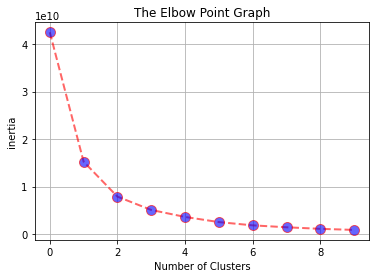

In [ ]:
#plt.figure(figsize = (10,10))
plt.grid()
plt.plot(inertia, color='red', linestyle='dashed', linewidth =2,
         marker='o', markerfacecolor='blue', markersize=10,alpha=0.6)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

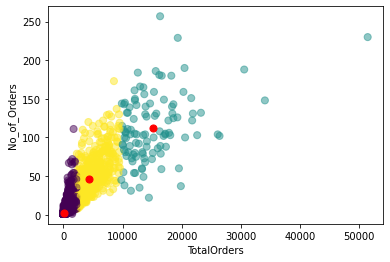

In [ ]:
#create and fit KMeans model
kmeans = KMeans(n_clusters=3).fit(cs1)

#calculate the centroids
centroids = kmeans.cluster_centers_

#predict labels
labels = kmeans.predict(cs1)

#add labels to dataframe
X['label'] = labels

#plot the data
plt.scatter(X['TotalOrders'],X['No_ofOrders'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('TotalOrders')
plt.ylabel('No_of_Orders')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
X.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,TotalOrders,No_ofOrders,TotalEmails,MailOpened_Yes,MailOpened_No,MailClicked_Yes,MailClicked_No,CustomerID,label
0,CITY2,0,0,0,Monday,15,1,30,30,0.0,1.0,28.0,C16368,0
1,CITY2,1,1,1,Friday,15614,186,96,89,7.0,10.0,85.0,C20345,1
2,CITY2,0,0,0,Wednesday,443,13,1,1,0.0,0.0,0.0,C17683,0
3,CITY4,0,0,0,Monday,748,7,31,28,3.0,4.0,26.0,C18647,0
4,CITY2,1,1,0,Friday,2350,34,65,19,46.0,10.0,54.0,C36692,2
